In [6]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer,StandardScaler
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline
sns.set(style='whitegrid',context='notebook')
np.set_printoptions(threshold='nan')

height has been deprecated.



In [2]:
far_df = pd.read_csv('./datasets/firmannualreports.csv',index_col=0)
ptu_df = pd.read_csv('./datasets/processtechnologyuses.csv',index_col=0)
advisor_df = pd.read_csv('./datasets/advisor.csv',index_col=0)
client_df = pd.read_csv('./datasets/client.csv',index_col=0)
financial_df = pd.read_csv('./datasets/financial.csv',index_col=0)
frb_df = pd.read_csv('./datasets/financialrevenuebreakdown.csv',index_col=0)
foe_df = pd.read_csv('./datasets/financialoperatingexpenses.csv',index_col=0)
fs_df = pd.read_csv('./datasets/firmsection.csv',index_col=0)
owner_df = pd.read_csv('./datasets/owner.csv',index_col=0)
process_df = pd.read_csv('./datasets/process.csv',index_col=0)
rev_df = pd.read_csv('./datasets/revenue.csv',index_col=0)
results_df = pd.read_csv('./datasets/firmanalyticsresults.csv',index_col=0)

In [3]:
df = far_df.merge(fs_df,how='inner',left_on='firmsectionid',right_index=True)
df = df.merge(client_df,how='inner',left_on='clientid',right_index=True)
df = df.merge(rev_df,how='inner',left_on='revenueid',right_index=True)
df = df.merge(process_df.astype('int'),how='inner',left_on='processid',right_index=True)
df = df.merge(ptu_df.astype('int'),how='inner',left_on='processtechnologyuseid',right_index=True)
df = df.merge(financial_df,how='inner',left_on='financialsid',right_index=True)
df = df.merge(advisor_df,how='inner',left_index=True,right_on='firmannualreportid')
df = df.merge(owner_df.astype('float'),how='inner',left_index=True,right_on='firmannualreportid')
df = df.merge(frb_df,how='inner',left_on='RevenueBreakdownId',right_index=True)
df = df.merge(foe_df,how='inner',left_on='OperatingExpensesId',right_index=True)
df = df.merge(results_df,how='inner',left_on='firmanalyticsresultid',right_index=True)
df.head()

,firmannualreportid,year,yearsinbusiness,firmid,firmsectionid,clientid,revenueid,processid,processtechnologyuseid,financialsid,firmanalyticsresultid,employeecount,ClientsCount,AverageClientAge,AverageClientRelationshipLength,AverageClientAdditions,AverageClientDepartures,ReferralRate,InstitutionalAumPercent,TopFiveClientsAumPercent,BeneficiaryLevel,ClientMeetingFrequency,Aum,DiscretionaryInvestmentAumPercent,AverageBasisPointsForAdvisory,NonCompetes,SuccessionPlan,ManagementRetentionProgram,ContinuityPlan,CompensationBonusPlan,StockOwnershipPlan,TechnologyDisasterRecoveryPlan,RecentLegalIssues,CurrentLegalIssues,crm,accounting,portfoliomanagement,portfolioaccounting,financialplanning,firmwebsite,clientportal,socialmedia,email,digitalcompliancemonitoring,digitalfinancialrecords,robotechnology,riskassessmentsoftware,TotalNetRevenue,ProjectedAnnualGrowthRate,RecurringRevenuePercent,TotalOutstandingAssets,TotalOutstandingLiabilities,RevenueBreakdownId,OperatingExpensesId,OtherIncomeAndExpensesId,OperatingExpenseAdjustmentsId,firmannualreportid_x,age_x,yearjoinedfirm_x,firmannualreportid_y,ispassive,isadvisor,age_y,ownershippercent,yearjoinedfirm_y,OtherPercent,EquityPercent,FixedIncomePercent,MutualFundsPercent,MunicipalsPercent,CommoditiesPercent,ManagedMoneyPercent,InsurancePercent,AnnuityPercent,FinancialPlanningAndConsultingPercent,OtherServicesPercent,totaldirectexpense,othercompensationandbenefits,officeexpenses,rent,technology,professionalservices,marketingandbusinessdevelopment,travelandentertainment,insurance,other,depreciation,amortization,taxes,Year,CashflowValue,NetBalanceSheet,TotalValue,NetRevenue,OperatingExpenses,IncomeFromOperations,Ebitda,Eboc,TruelyticsScore,DiscountRate,ComparablesId,GrowthRateId,ExpenseRatioId,DiscountFactorId,BusinessStabilityId,MarketStabilityId,ClientStabilityId,ProFormaId
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,2014,28.0,591,1,1,1,1,1,1,1,14,982,59,11,40,35,100.0,6.0,12.0,0.0,3.0,475000000.0,43.0,0.0,0,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,2350000.0,5.0,87.0,0.0,0.0,1,1,1,1,1,46.0,2008.0,1.0,0.0,1.0,71.0,50.0,1986.0,0.0,0.0,0.0,29.0,0.0,4.0,57.0,0.0,10.0,0.0,0.0,346067.0,8024.0,36925.0,62731.0,105222.0,24657.0,119618.0,43809.0,2187.0,3693.0,0.0,0.0,0.0,2014,7.208358e+06,0.0,7.208358e+06,2350000.0,557000.0,1793000.0,1830000.0,2360000.0,2.944333,30.3,1,1,1,1,1,3,2,1
2,1,2014,28.0,591,1,1,1,1,1,1,1,14,982,59,11,40,35,100.0,6.0,12.0,0.0,3.0,475000000.0,43.0,0.0,0,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,2350000.0,5.0,87.0,0.0,0.0,1,1,1,1,1,46.0,2008.0,1.0,0.0,1.0,69.0,50.0,1998.0,0.0,0.0,0.0,29.0,0.0,4.0,57.0,0.0,10.0,0.0,0.0,346067.0,8024.0,36925.0,62731.0,105222.0,24657.0,119618.0,43809.0,2187.0,3693.0,0.0,0.0,0.0,2014,7.208358e+06,0.0,7.208358e+06,2350000.0,557000.0,1793000.0,1830000.0,2360000.0,2.944333,30.3,1,1,1,1,1,3,2,1
3,2,2014,28.0,591,1,1,1,1,1,1,1,14,982,59,11,40,35,100.0,6.0,12.0,0.0,3.0,475000000.0,43.0,0.0,0,1,0,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,2350000.0,5.0,87.0,0.0,0.0,1,1,1,1,1,41.0,2013.0,2.0,0.0,1.0,56.0,100.0,1996.0,0.0,0.0,0.0,29.0,0.0,4.0,57.0,0.0,10.0,0.0,0.0,346067.0,8024.0,36925.0,62731.0,105222.0,24657.0,119618.0,43809.0,2187.0,3693.0,0.0,0.0,0.0,2014,7.208358e+06,0.0,7.208358e+06,2350000.0,557000.0,1793000.0,1830000.0,2360000.0,2.944333,30.3,1,1,1,1,1,3,2,1
6,5,2015,18.0,203,5,5,5,5,5,5,5,7,80,65,15,1,1,90.0,0.0,10.0,0.0,1.0,202020000.0,100.0,0.0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,662674.0,5.0,90.0,0.0,0.0,5,5,5,5,5,44.0,2060.0,5.0,0.0,1.0,78.0,50.0,1985.0,0.0,20.0,20.0,50.0,8.0,0.0,0.0,0.0,0.0,2.0,0.0,140800.0,0.0,13450.0,50000.0,4500.0,0.0,2500.0,25500.0,14078.0,0.0,9197.0,10401.0,24300.0,2015,1.376342e+06,0.0,1.376342e+06,662674.0,392050.0,270624.0,294924.0,473224.0,2.388667,32.5,5,5,5,5,13,15,14,5
7,5,2015,18.0,203,5,5,5,5,5,5,5,7,80,65,15,1,1,90.0,0.0,10.0,0.0,1.0,202020000.0,100.0,0.0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,662674.0,5.0,90.0,0.0,0.0,5,5,5,5,5,44.0

In [15]:
##standardize variables function
def standardization_f(x):
    x_bar = np.mean(x)
    s = np.std(x)
    x_z = (x-x_bar)/s
    return(x_z)

In [4]:
rm_col = ['firmid','firmsectionid','clientid','revenueid','processid','processtechnologyuseid',
          'financialsid','firmanalyticsresultid','firmannualreportid_x','RevenueBreakdownId',
          'OperatingExpensesId','OtherIncomeAndExpensesId','OperatingExpenseAdjustmentsId',
          'firmannualreportid_y','TotalNetRevenue','firmannualreportid','TotalOutstandingAssets',
          'Aum','ProjectedAnnualGrowthRate','RecurringRevenuePercent','TotalOutstandingLiabilities',
          'OtherPercent','ispassive','isadvisor']
df.drop(rm_col,axis=1,inplace=True)

In [16]:
numerical_cols = df.columns[:65].tolist()
numerical_cols.append('NetRevenue')
N = len(numerical_cols)
#numerical_cols

In [35]:
X_z = df[numerical_cols].astype('int').apply(standardization_f,broadcast=False).head()
X_z.head()

,year,yearsinbusiness,employeecount,ClientsCount,AverageClientAge,AverageClientRelationshipLength,AverageClientAdditions,AverageClientDepartures,ReferralRate,InstitutionalAumPercent,TopFiveClientsAumPercent,BeneficiaryLevel,ClientMeetingFrequency,DiscretionaryInvestmentAumPercent,AverageBasisPointsForAdvisory,NonCompetes,SuccessionPlan,ManagementRetentionProgram,ContinuityPlan,CompensationBonusPlan,StockOwnershipPlan,TechnologyDisasterRecoveryPlan,RecentLegalIssues,CurrentLegalIssues,crm,accounting,portfoliomanagement,portfolioaccounting,financialplanning,firmwebsite,clientportal,socialmedia,email,digitalcompliancemonitoring,digitalfinancialrecords,robotechnology,riskassessmentsoftware,age_x,yearjoinedfirm_x,age_y,ownershippercent,yearjoinedfirm_y,EquityPercent,FixedIncomePercent,MutualFundsPercent,MunicipalsPercent,CommoditiesPercent,ManagedMoneyPercent,InsurancePercent,AnnuityPercent,FinancialPlanningAndConsultingPercent,OtherServicesPercent,totaldirectexpense,othercompensationandbenefits,officeexpenses,rent,technology,professionalservices,marketingandbusinessdevelopment,travelandentertainment,insurance,other,depreciation,amortization,taxes,NetRevenue
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1.235380,0.946473,-0.288743,0.377805,-0.149897,0.333195,-0.105219,0.571346,0.920470,-0.231201,-0.380290,-1.401323,-0.210724,-0.863624,-0.471484,-0.546986,0.869310,-0.778818,0.500580,0.61667,-0.422069,-0.62671,-0.193742,-0.11879,0.368690,0.317999,0.271487,0.661312,0.309077,0.208716,0.398923,0.805182,0.434205,0.62097,0.395793,-0.169192,-0.494776,0.165674,-0.078584,1.830465,-0.170152,-1.894543,-0.495138,-0.638390,-0.069027,-0.372424,0.540599,0.569945,-0.37859,0.477232,-0.365680,-0.408159,-0.309949,-0.643771,-0.316904,-0.217583,0.109565,-0.304642,1.996549,0.21843,-0.666846,-0.245221,-0.427509,-0.332078,-0.702812,-0.419145
2,-1.235380,0.946473,-0.288743,0.377805,-0.149897,0.333195,-0.105219,0.571346,0.920470,-0.231201,-0.380290,-1.401323,-0.210724,-0.863624,-0.471484,-0.546986,0.869310,-0.778818,0.500580,0.61667,-0.422069,-0.62671,-0.193742,-0.11879,0.368690,0.317999,0.271487,0.661312,0.309077,0.208716,0.398923,0.805182,0.434205,0.62097,0.395793,-0.169192,-0.494776,0.165674,-0.078584,1.638412,-0.170152,-0.584665,-0.495138,-0.638390,-0.069027,-0.372424,0.540599,0.569945,-0.37859,0.477232,-0.365680,-0.408159,-0.309949,-0.643771,-0.316904,-0.217583,0.109565,-0.304642,1.996549,0.21843,-0.666846,-0.245221,-0.427509,-0.332078,-0.702812,-0.419145
3,-1.235380,0.946473,-0.288743,0.377805,-0.149897,0.333195,-0.105219,0.571346,0.920470,-0.231201,-0.380290,-1.401323,-0.210724,-0.863624,-0.471484,-0.546986,0.869310,-0.778818,0.500580,0.61667,-0.422069,-0.62671,-0.193742,-0.11879,0.368690,0.317999,0.271487,0.661312,0.309077,0.208716,0.398923,0.805182,0.434205,0.62097,0.395793,-0.169192,-0.494776,-0.273138,-0.074880,0.390073,1.241667,-0.802978,-0.495138,-0.638390,-0.069027,-0.372424,0.540599,0.569945,-0.37859,0.477232,-0.365680,-0.408159,-0.309949,-0.643771,-0.316904,-0.217583,0.109565,-0.304642,1.996549,0.21843,-0.666846,-0.245221,-0.427509,-0.332078,-0.702812,-0.419145
6,-0.266842,0.100876,-0.288794,-0.711168,-0.063930,1.175856,-0.479468,-0.342907,0.532805,-0.567551,-0.521434,-1.401323,-2.836860,0.812134,-0.471484,-0.546986,-1.150337,1.283997,-1.997684,0.61667,-0.422069,-0.62671,-0.193742,-0.11879,-2.712303,-3.144660,0.271487,0.661312,-3.235442,-4.791196,-2.506748,-1.241955,-2.303062,0.62097,0.395793,-0.169192,-0.494776,-0.009851,-0.040057,2.502648,-0.170152,-2.003699,0.812454,1.414973,0.581796,0.871972,-0.337722,-0.907977,-0.37859,-0.437194,-0.213331,-0.408159,-0.483107,-0.655304,-0.460768,-0.314428,-0.539265,-0.643975,-0.550837,-0.11573,-0.297176,-0.250690,-0.188865,-0.035892,-0.192300,-0.834844
7,-0.266842,0.100876,-0.288794,-0.711168,-0.063930,1.175856,-0.479468,-0.342907,0.532805,-0.567551,-0.521434,-1.401323,-2.836860,0.812134,-0.471484,-0.546986,-1.150337,1.283997,-1.997684,0.61667,-0.422069,-0.62671,-0.193742,-0.1187

In [37]:
cov_mat = X_z.cov()
eig_val,eig_vec = np.linalg.eig(cov_mat)
pc_label = ['PC%d' % (i+1)for i in range(len(numerical_cols))]
eigVec_df = pd.DataFrame(eig_vec,index=numerical_cols,columns=pc_label)
eigVec_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66
year,(-0.0853576653306+0j),(0.00196326430733+0j),(0.00558428449898+0j),(0.00335136119308+0j),(-0.16702130874+0j),(-0.0662330620234-0.106302930748j),(-0.0662330620234+0.106302930748j),(-0.0105941822909+0j),(-0.0111190838537+0j),(0.0513198671034+0.108276830436j),(0.0513198671034-0.108276830436j),(0.0758647399172+0.0192679068088j),(0.0758647399172-0.0192679068088j),(0.118048046268+0j),(0.0707681608945-0.13879822736j),(0.0707681608945+0.13879822736j),(-0.132179681592+0.0967001363125j),(-0.132179681592-0.0967001363125j),(0.0467660504536-0.0659856500493j),(0.0467660504536+0.0659856500493j),(0.235098171873+0.0434827381526j),(0.235098171873-0.0434827381526j),(-0.297794253728-0.0423710148785j),(-0.297794253728+0.0423710148785j),(0.191661917214-0.138319296212j),(0.191661917214+0.138319296212j),(0.30113467051+0j),(-0.449215620134+0j),(-0.449215620134-0j),(0.15961634464+0.285507948343j),(0.15961634464-0.285507948343j),(-0.521200897265+0j),(-0.521200897265-0j),(-0.2445413352-0.0760720231218j),(-0.2445413352+0.0760720231218j),(0.545567423846+0j),(0.545567423846-0j),(-0.142067591366-0.0223861556835j),(-0.142067591366+0.0223861556835j),(-0.227500631383+0.323346667174j),(-0.227500631383-0.323346667174j),(-0.0320271988888+0j),(0.0464602992854+0j),(-0.0533043965014-0.0939756226159j),(-0.0533043965014+0.0939756226159j),(-0.160107352697+0.143240787547j),(-0.160107352697-0.143240787547j),(0.00113637825019-0.001965083272j),(0.00113637825019+0.001965083272j),(4.87673063848e-07+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
yearsinbusiness,(0.0745228697961+0j),(-0.00171405918594+0j),(-0.00487544856118+0j),(-0.00292595928982+0j),(0.0355097394479+0j),(-0.0168822626356-5.39542613932e-05j),(-0.0168822626356+5.39542613932e-05j),(0.0197051232431+0j),(0.0267608384732+0j),(-0.00553489001842+0.00409548134206j),(-0.00553489001842-0.00409548134206j),(-0.0533412645926+0.072103322866j),(-0.0533412645926-0.072103322866j),(-0.0933588682152+0j),(0.00533210799356-0.028368231621j),(0.00533210799356+0.028368231621j),(-0.00639265626915+0.0183458824809j),(-0.00639265626915-0.0183458824809j),(-0.0549307462659+0.0395262433571j),(-0.0549307462659-0.0395262433571j),(0.035242540428-0.00536027652595j),(0.035242540428+0.00536027652595j),(0.0294568819577+0.014148353886j),(0.0294568819577-0.014148353886j),(-0.0165621714899-0.00241111595388j),(-0.0165621714899+0.00241111595388j),(-0.0299864156632+0j),(0.0584850802768+0.0221347640901j),(0.0584850802768-0.0221347640901j),(-0.0172001067989-0.015175479347j),(-0.0172001067989+0.015175479347j),(0.0665040845789-0.00654739086237j),(0.0665040845789+0.00654739086237j),(0.0375669480341+0.00577721545142j),(0.0375669480341-0.00577721545142j),(-0.0487532322121-0.00498171525479j),(-0.0487532322121+0.00498171525479j),(0.00714484601497-0.00223337296843j),(0.00714484601497+0.00223337296843j),(0.0195699946172-0.0253352926718j),(0.0195699946172+0.0253352926718j),(0.00512108391615+0j),(-0.0152307281357+0j),(-0.0106858018826+0.0100099575662j),(-0.0106858018826-0.0100099575662j),(0.0233520621538-0.0101865184541j),(0.0233520621538+0.0101865184541j),(0.00152355771884-0.00833789808841j),(0.00152355771884+0.00833789808841j),(0.00137587373035+0j),0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j,0j
employeecount,(4.46286168282e-06+0j),(-1.02647806253e-07+0j),(-2.91970137903e-07+0j),(-1.75223412876e-07+0j),(-0.000165398188854+0j),(-0.000145319314628+2.52575185658e-05j),(-0.000145319314628-2.52575185658e-05j),(8.11530525768e-06+0j),(-1.5469420088e-05+0j),(0.000165156710622-7.0602846537e-06j),(0.000165156710622+7.0602846537e-06j),(-8.37548850849e-05-6.27212969827e-05j),(-8.37548850849e-05+6.27212969827e-05j),(-0.00015635862563+0j),(-4.51336503894

In [38]:
##Using sklearn, to compute PCS and explained variance ratios
pca = PCA(n_components=9)
pca.fit(X_z)
pca_PCs = pca.transform(X_z)

variance = pca.explained_variance_ratio_
print('Explained Variance Eigenvalues')
print(variance)
print('\nPrincipal Components')
print(pca_PCs[:10,:])

Explained Variance Eigenvalues
[  9.38685172e-01   4.73812817e-02   1.03859757e-02   3.54757081e-03
   4.04319752e-32]

Principal Components
[[ -4.51262517e+00   8.61814714e-01  -3.81716839e-01   5.33614348e-01
   -9.01030284e-16]
 [ -4.52230068e+00   8.69434603e-02  -5.92981389e-01  -5.18769065e-01
    4.66396263e-15]
 [ -4.58016711e+00  -9.64564965e-01   9.64842858e-01  -1.28250077e-02
   -1.09531931e-15]
 [  6.73800406e+00   1.75678517e+00   3.79767422e-01  -1.23124654e-01
   -1.52972646e-15]
 [  6.87708890e+00  -1.74097838e+00  -3.69912052e-01   1.21104379e-01
   -1.69703256e-16]]


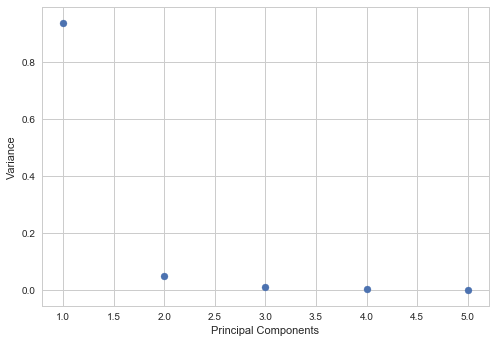

In [39]:
plt.scatter(xrange(1,6),variance)
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.show()